In [9]:
from __future__ import division, print_function, absolute_import

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from PIL import Image
import cv2

In [10]:
batch_size=64
learning_rate = 0.01
epochs=50
num_classes=28

In [11]:
trainx = pd.read_csv("ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv",header=None)
trainy = pd.read_csv("ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv",header=None)

testx = pd.read_csv("ahcd1/csvTestImages 3360x1024.csv",header=None)
testy = pd.read_csv("ahcd1/csvTestLabel 3360x1.csv",header=None)

chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
chars

['ا',
 'ب',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ف',
 'ق',
 'ك',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ي']

In [4]:
X_train = []
y_train=list(trainy[0])
for i in range(len(trainx)):
    img = trainx.iloc[i,:].values.reshape(32,32,1)
    X_train.append(img)


In [5]:
X_test = []
y_test=list(testy[0])
for i in range(len(testx)):
    img = testx.iloc[i,:].values.reshape(32,32,1)
    X_test.append(img)

In [6]:
def display_images(X_train,row,col):
    fig = plt.figure(figsize=(12,12))
    ax = fig.subplots(row,col)
    for j in range(row):
        for i in range(col):
            fig.suptitle('Images')
            ax[j,i].imshow(X_train[random.randint(0,len(X_train))])
    plt.plot()

In [7]:
def preprocess_data(train_data_x):
    train_data_x = train_data_x.to_numpy().reshape((train_data_x.shape[0], 32, 32)).astype('uint8')
    for i in range(len(train_data_x)):
        train_data_x[i] = cv2.rotate(train_data_x[i], cv2.ROTATE_90_CLOCKWISE)      # Rotating the images.
        train_data_x[i] = np.flip(train_data_x[i], 1)                               # Flipping the images
    train_data_x = train_data_x.reshape([-1, 32, 32, 1]).astype('uint8')          # Reshaping into the required size.
    train_data_x = train_data_x.astype('float32')/255                             # Here we normalize our images.
    return np.asarray(train_data_x)

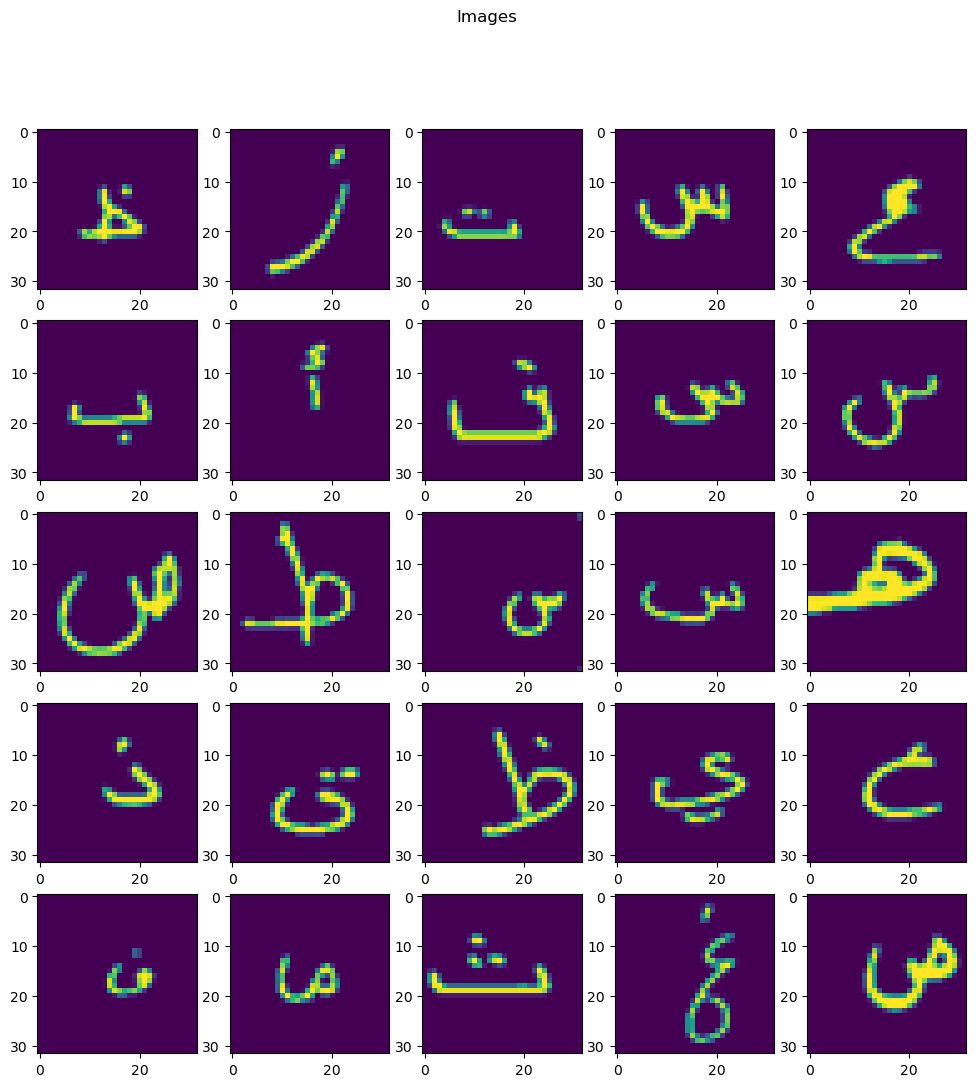

In [8]:
X_train =preprocess_data(trainx)
display_images(X_train,5,5)

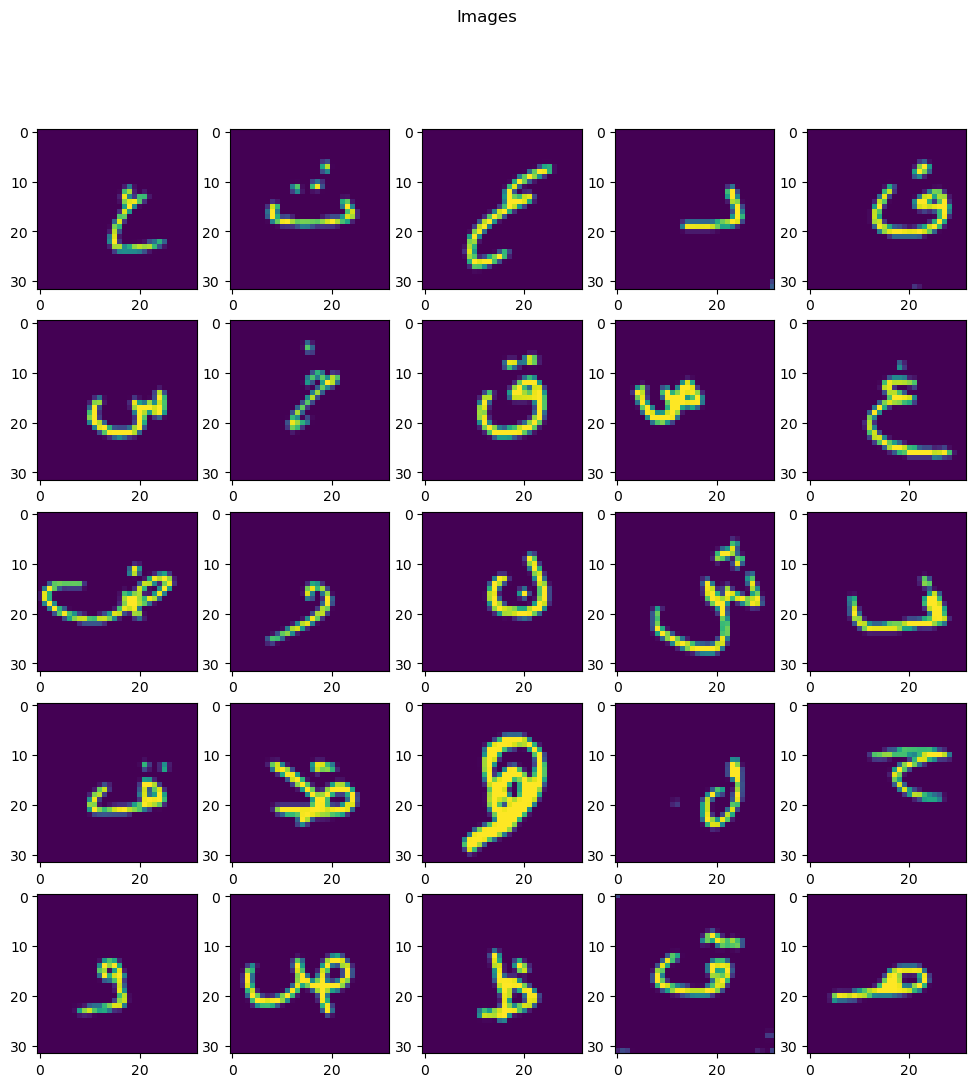

In [9]:
X_test =preprocess_data(testx)
display_images(X_test,5,5)

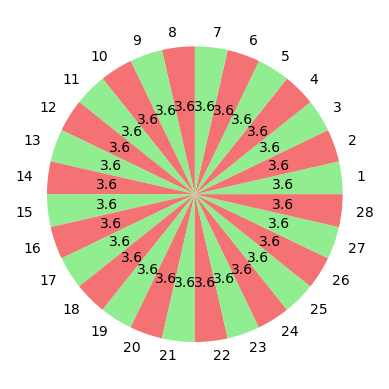

In [10]:
classes=np.unique(y_train)
plt.pie(trainy[0].value_counts(), labels=classes, colors=['#90EE91', '#F47174'], autopct='%1.1f')
plt.show()

In [11]:


def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):  
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 1), activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(28, activation='softmax'))

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

In [12]:
model = create_model()                                                          # Now we created an instance of a model with our custom architefture.
model.summary()                                                                 # Then we display our model's summary.




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                     

In [13]:
model = create_model(optimizer=tf.keras.optimizers.Adamax(0.001),
                     kernel_initializer='uniform',
                     activation='relu')

In [2]:
import keras
model = keras.models.load_model("C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe/my_model.h5")

In [12]:
def display_images_result(X_train,row,col):
    fig = plt.figure(figsize=(12,12))
    ax = fig.subplots(row,col)
    for j in range(row):
        for i in range(col):
            fig.suptitle('Images')
            idx=random.randint(0,len(X_train))
            ax[j,i].imshow(X_train[idx])
            pred=model.predict(np.expand_dims(X_test[idx], axis=0))
            ax[j,i].set_title(chars[(np.argmax(pred,axis=1)[0])],fontdict={'fontsize':20,})
    plt.plot()

In [4]:
from matplotlib import rcParams
display_images_result(X_test,10,10)

NameError: name 'X_test' is not defined

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to match the input shape of your model
    image = cv2.resize(image, (32, 32))
    # Normalize the image
    image = image.astype('float32') / 255.0
    # Reshape the image to match the input shape expected by the model
    image = np.reshape(image, (1, 32, 32, 1))
    return image


def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    # Use the model to predict the class of the image
    prediction = model.predict(preprocessed_image)
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    # Get the predicted class label
    predicted_class_label = chars[predicted_class_index]
    return predicted_class_label

def display_image_with_prediction(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Predict the class of the image
    prediction = predict_image(image_path)
    # Display the predicted class as title
    plt.title(f"Predicted: {prediction}", fontsize=16)
    plt.axis('off')
    plt.show()




1/1 [==============================] - 0s 18ms/step


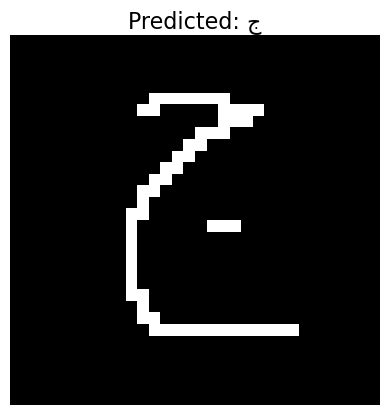

In [43]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe3.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 17ms/step


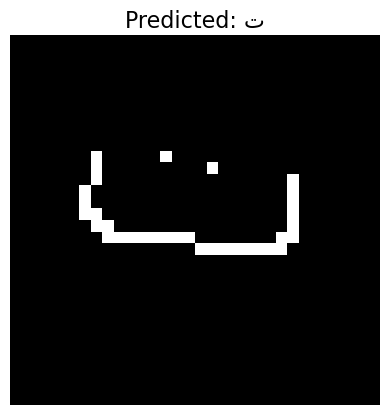

In [65]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe4.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 16ms/step


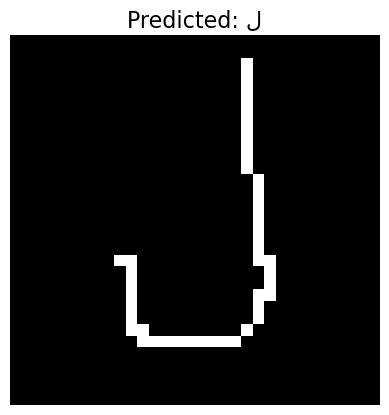

In [71]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe5.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 17ms/step


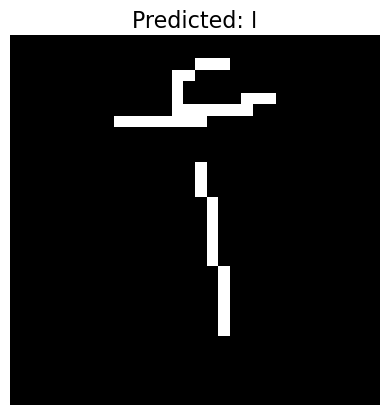

In [74]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe6.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 17ms/step


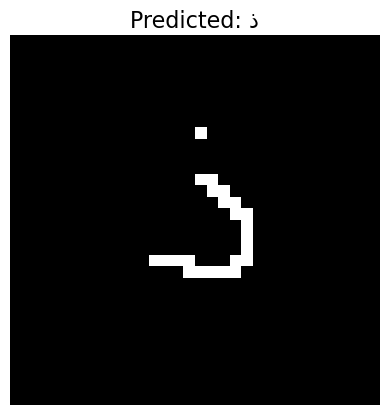

In [79]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe7.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 17ms/step


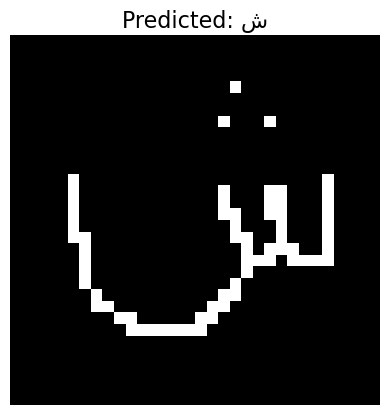

In [83]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe1.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 17ms/step


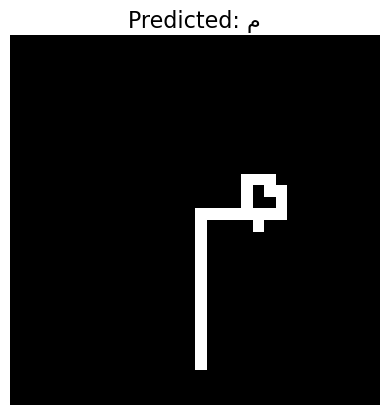

In [94]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe2.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 24ms/step


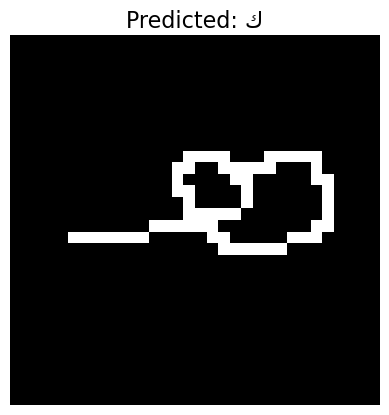

In [25]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/ar.png"
display_image_with_prediction(image_path)

1/1 [==============================] - 0s 19ms/step


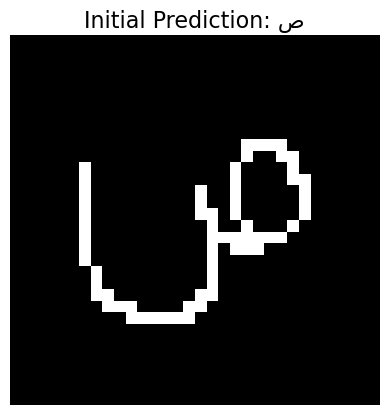

Great! The initial prediction is correct.


In [166]:
def predict_image(image_path, excluded_chars=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    if excluded_chars:
        for char in excluded_chars:
            excluded_index = chars.index(char)
            prediction[0][excluded_index] = 0
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = chars[predicted_class_index]
    return predicted_class_label

def predict_another_letter(exclude_prediction):
    excluded_chars = [exclude_prediction]
    new_prediction = predict_image(image_path, excluded_chars)
    return new_prediction

def display_image_and_correct_prediction(image_path):
    initial_prediction = display_image_with_initial_prediction(image_path)
    correct_label = input("Is the initial prediction correct? (y/n): ").lower().strip()
    if correct_label == 'n':
        new_prediction = predict_another_letter(initial_prediction)
        print("New prediction excluding the first wrong guess:", new_prediction)
    elif correct_label == 'y':
        print("Great! The initial prediction is correct.")
    else:
        print("Invalid input. Please enter 'y' or 'n'.")

# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe9.png"
display_image_and_correct_prediction(image_path)


1/1 [==============================] - 0s 28ms/step


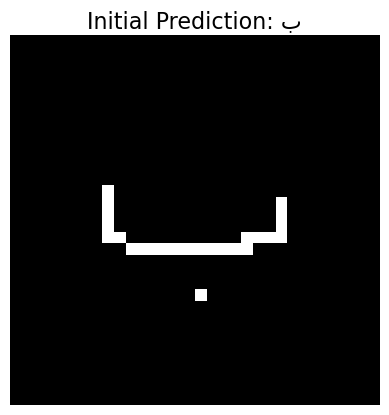

Great! The initial prediction is correct.


In [167]:
def display_image_with_initial_prediction(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Predict the class of the image
    initial_prediction = predict_image(image_path)
    # Display the initial predicted class as title
    plt.title(f"Initial Prediction: {initial_prediction}", fontsize=16)
    plt.axis('off')
    plt.show()
    return initial_prediction

def display_image_and_correct_prediction(image_path):
    # Display the image and initial prediction
    initial_prediction = display_image_with_initial_prediction(image_path)
    # Prompt user for correction
    correct_label = input("Is the initial prediction correct? (y/n): ").lower().strip()
    if correct_label == 'n':
        # If prediction is incorrect, prompt user for correct label
        correct_label = input("Please enter the correct label: ").strip()
        print("Thank you for correcting the prediction!")
    elif correct_label == 'y':
        print("Great! The initial prediction is correct.")
    else:
        print("Invalid input. Please enter 'y' or 'n'.")

# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe8.png"
display_image_and_correct_prediction(image_path)

1/1 [==============================] - 0s 30ms/step


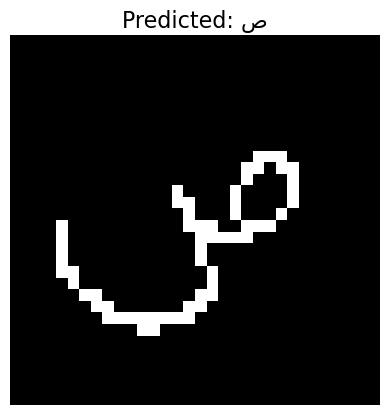

In [193]:
# Example usage
image_path = "C:/Users/kalle/OneDrive - ESPRIT/Esprit/4A/PI/Handwriting/arabe8.png"
display_image_with_prediction(image_path)